In [56]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
import numpy as np

In [57]:
data = pd.read_csv("demo.csv")

In [58]:
X = data.drop(['Y'], axis='columns').values
y = data['Y']

In [59]:
def cross_validation(model, _X, _y, _cv=10):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=_scoring, return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
            "Mean Training Accuracy": results['train_accuracy'].mean()*100,
            "Validation Accuracy scores": results['test_accuracy'],
            "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
            }

In [60]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold", "6th Fold", "7th Fold", "8th Fold", "9th Fold", "10th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [61]:
gnb = GaussianNB()

gnb_result = cross_validation(gnb, X, y, 10)
print(gnb_result)

/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels

{'Training Accuracy scores': array([0.87301587, 0.87142857, 0.87142857, 0.87142857, 0.86984127,
       0.85555556, 0.87142857, 0.87142857, 0.87142857, 0.87301587]), 'Mean Training Accuracy': 87.00000000000001, 'Validation Accuracy scores': array([0.84285714, 0.85714286, 0.85714286, 0.85714286, 0.87142857,
       0.92857143, 0.85714286, 0.85714286, 0.85714286, 0.84285714]), 'Mean Validation Accuracy': 86.28571428571428}


/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/bengisubulur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels

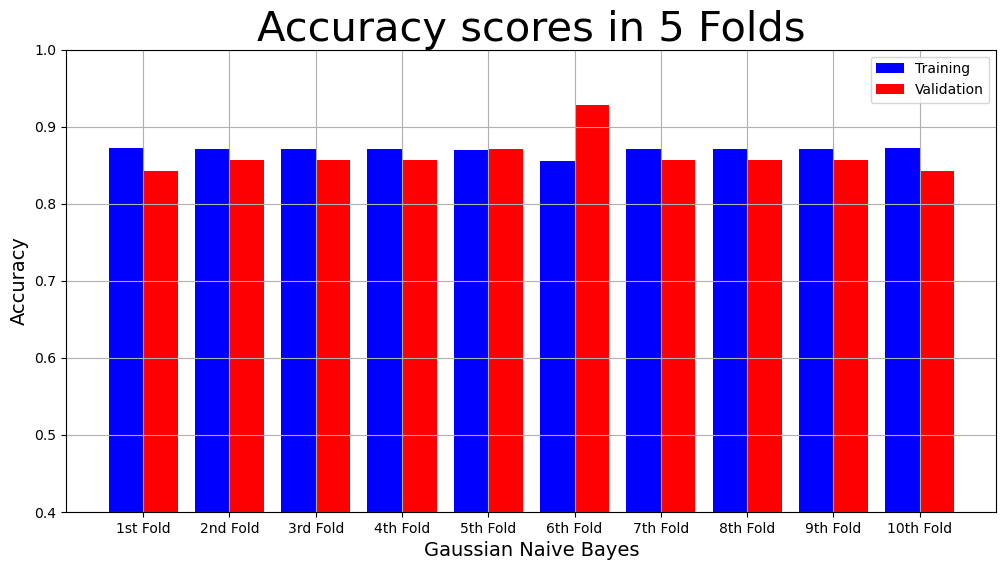

In [62]:
plot_result("Gaussian Naive Bayes", "Accuracy", "Accuracy scores in 5 Folds", gnb_result["Training Accuracy scores"], gnb_result["Validation Accuracy scores"])

In [63]:
gnb.fit(X, y)
print(gnb.predict([[2,1,0,1,4]]))

['1.2.3 isik False']


In [64]:
def predict_control_suggestions(saat, gun, haftaicisonu, ay, mevsim, threshold_):
    query_instance = np.array([[saat, gun, haftaicisonu, ay, mevsim]])
    predicted_suggestion_ = gnb.predict(query_instance)[0]
    probabilities = gnb.predict_proba(query_instance)[0]

    suggestions_with_probabilities = list(zip(gnb.classes_, probabilities))
    suggestions_with_probabilities.sort(key=lambda x: x[1], reverse=True)

    filtered_suggestions = [(suggestion, probability) for suggestion, probability in suggestions_with_probabilities if probability >= threshold_]

    return predicted_suggestion_, filtered_suggestions

In [65]:
predicted_suggestion, control_suggestions = predict_control_suggestions(2, 1, 0, 1, 4, 0)

print("Predicted Suggestion:", predicted_suggestion)
print("All Suggestions with Probabilities:", control_suggestions)

Predicted Suggestion: 1.2.3 isik False
All Suggestions with Probabilities: [('1.2.3 isik False', 0.5259573863978171), ('6.3.2 isik True', 0.41806262663712623), ('2.5.6 isik False', 0.026803062386576208), ('6.3.2 isik False', 0.014913974005934638), ('1.2.3 isik True', 0.014262950555849826), ('2.2.3 klima 25', 1.6695901132509652e-11), ('2.2.3 klima 24', 4.605608316501957e-27), ('1.5.3 isik True', 1.202205149251825e-49), ('1.5.3 isik False', 3.531505482472677e-79), ('2.2.4 klima -1', 1.1674301460063884e-115), ('2.2.4 klima +1', 4.3430181115037444e-159), ('5.3.1 klima 12', 1.8182018493063522e-209), ('5.3.1 klima 13', 8.566082794516082e-267), ('2.5.6 isik True', 0.0)]
